<bound method NDFrame.head of       0.85  17.45
0     0.75  15.60
1     3.30  15.45
2     5.25  14.20
3     4.90  15.65
4     5.35  15.85
..     ...    ...
367  38.75  16.85
368  39.00  16.60
369  38.25  17.35
370  39.50  16.95
371  39.90  17.05

[372 rows x 2 columns]>
total  81 mismatch out of  372
kmeans accuracy computed: 0.782258064516129


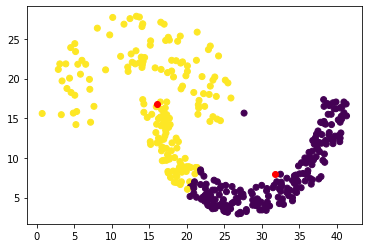

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

data=pd.read_csv('jain.csv')
#print(data)
df=data.iloc[:,0:2]
df_label=data.iloc[:,2:3]
print(df.head)

kmeans=KMeans(n_clusters=2, n_init=10, max_iter=300).fit(df)
centroids = kmeans.cluster_centers_
labels=kmeans.labels_
inertia = kmeans.inertia_
#print(labels)
#print(inertia)
#print(centroids)
pred_label = kmeans.predict(df)

#print(np.unique(data.iloc[:,2:3]))
#print(np.unique(pred_label))
total_mismatch=0
for i in range(len(pred_label)):
    if df_label.iloc[i,0]!=pred_label[i]:
        #print(df_label.iloc[i,0],':',pred_label[i])
        total_mismatch=total_mismatch+1
print("total ",total_mismatch,"mismatch out of ",len(pred_label))
print("kmeans accuracy computed: "+str((len(pred_label)-total_mismatch)/len(pred_label)))

plt.scatter(x=data.iloc[:,0:1], y=data.iloc[:,1:2], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()